# Activity: Evaluate simple linear regression

## Introduction

In this activity, you will use simple linear regression to explore the relationship between two continuous variables. To accomplish this, you will perform a complete simple linear regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and communicating results to stakeholders.

For this activity, you are part of an analytics team that provides insights about marketing and sales. You have been assigned to a project that focuses on the use of influencer marketing, and you would like to explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, leaders in your company will make decisions about where to focus future marketing efforts, so it is critical to have a clear understanding of the relationship between the different types of marketing and the revenue they generate.

This activity will develop your knowledge of linear regression and your skills evaluating regression results which will help prepare you for modeling to provide business recommendations in the future.

## Step 1: Imports

### Import packages

Import relevant Python libraries and packages. In this activity, you will need to use `pandas`, `pyplot` from `matplotlib`, and `seaborn`.

In [3]:
# Import pandas, pyplot from matplotlib, and seaborn.

### YOUR CODE HERE ### 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

### Import the statsmodel module and the ols function

Import the `statsmodels.api` Python module using its common abbreviation, `sm`, along with the `ols()` function from `statsmodels.formula.api`. To complete this, you will need to write the imports as well.

In [4]:
# Import the statsmodel module.

# Import the ols function from statsmodels.

### YOUR CODE HERE ###
import statsmodels.api as sm 
from statsmodels.formula.api import ols

### Load the dataset

`Pandas` was used to load the provided dataset `modified_marketing_and_sales_data.csv` as `data`, now display the first five rows. This is a fictional dataset that was created for educational purposes. The variables in the dataset have been kept as is to suit the objectives of this activity. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [5]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###
data = pd.read_csv('modified_marketing_and_sales_data.csv')

# Display the first five rows.

### YOUR CODE HERE ### 
data.head() 

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


## Step 2: Data exploration

### Familiarize yourself with the data's features

Start with an exploratory data analysis to familiarize yourself with the data and prepare it for modeling.

The features in the data are:
* TV promotion budget (in millions of dollars)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)

Each row corresponds to an independent marketing promotion where the business invests in `TV`, `Social_Media`, and `Radio` promotions to increase `Sales`.

The business would like to determine which feature most strongly predicts `Sales` so they have a better understanding of what promotions they should invest in in the future. To accomplish this, you'll construct a simple linear regression model that predicts sales using a single independent variable. 

### Explore the data size

Calculate the number of rows and columns in the data.

In [6]:
# Display the shape of the data as a tuple (rows, columns).

### YOUR CODE HERE ### 
data.shape

(4572, 4)

### Explore the independent variables

There are three continuous independent variables: `TV`, `Radio`, and `Social_Media`. To understand how heavily the business invests in each promotion type, use `describe()` to generate descriptive statistics for these three variables.

In [7]:
# Generate descriptive statistics about TV, Radio, and Social_Media.

### YOUR CODE HERE ###
data[['TV', 'Radio', 'Social_Media']].describe() 

,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


### Explore the dependent variable

Before fitting the model, ensure the `Sales` for each promotion (i.e., row) is present. If the `Sales` in a row is missing, that row isn't of much value to the simple linear regression model.

Display the percentage of missing values in the `Sales` column in the DataFrame `data`.

In [8]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Sales         4566 non-null   float64
dtypes: float64(4)
memory usage: 143.0 KB


### Remove the missing data

Remove all rows in the data from which `Sales` is missing.

In [9]:
# Subset the data to include rows where Sales is present.

### YOUR CODE HERE ### 
data = data[data['Sales'].notna()]

In [10]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4566 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4556 non-null   float64
 1   Radio         4562 non-null   float64
 2   Social_Media  4560 non-null   float64
 3   Sales         4566 non-null   float64
dtypes: float64(4)
memory usage: 178.4 KB


In [11]:
data.isnull().sum() 

TV              10
Radio            4
Social_Media     6
Sales            0
dtype: int64

For the other variables, we will just fill up the average of the values in the column. 

In [13]:
for column in data:
    if column != 'Sales': 
        a = data[column].mean() 
        data[column] = data[column].fillna(a)

In [14]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4566 entries, 0 to 4571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4566 non-null   float64
 1   Radio         4566 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Sales         4566 non-null   float64
dtypes: float64(4)
memory usage: 178.4 KB


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Apply `dropna()` to `data` and use the `subset` and `axis` arguments to drop rows where `Sales` is missing. 

</details>


### Visualize the sales distribution

Create a histogram to visualize the distribution of `Sales`.

Text(0.5, 1.0, 'Histogram of sales')

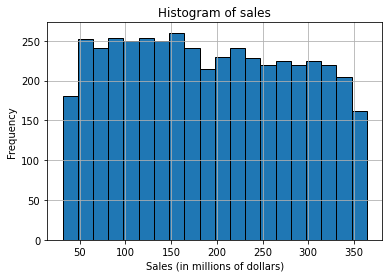

In [17]:
# Create a histogram of the Sales.

### YOUR CODE HERE ### 

# Add a title
data.hist(column = 'Sales', bins = 20, edgecolor = 'black')
plt.xlabel('Sales (in millions of dollars)')
plt.ylabel('Frequency')
plt.title('Histogram of sales')

## Step 3: Model building

Create a pairplot to visualize the relationships between pairs of variables in the data. You will use this to visually determine which variable has the strongest linear relationship with `Sales`. This will help you select the X variable for the simple linear regression.

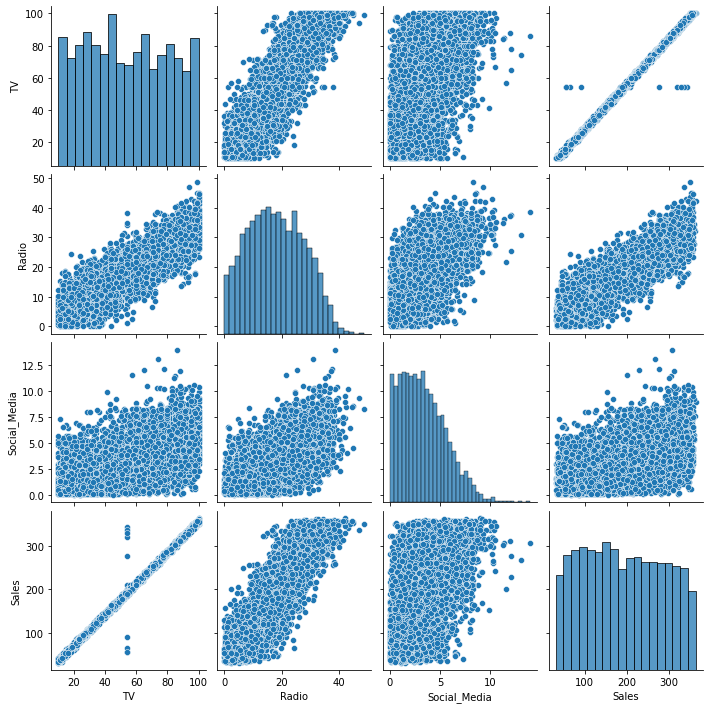

In [18]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 
import seaborn as sns

sns.pairplot(data)

**Question:** Which variable did you select for X? Why?

From the scatter plots, we observe that there is a very strong dependence between TV and Sales. So we will select <b> TV </b> as the variable.

### Build and fit the model

Replace the comment with the correct code. Use the variable you chose for `X` for building the model.

In [21]:
# Define the OLS formula.
# Create an OLS model.
# Fit the model.
# Save the results summary.
# Display the model results.
### YOUR CODE HERE ###

import statsmodels.formula.api as smf
model = smf.ols(formula = 'Sales ~ TV', data = data).fit() 
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 9.546e+05
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:09:56   Log-Likelihood:                -14971.
No. Observations:                4566   AIC:                         2.995e+04
Df Residuals:                    4564   BIC:                         2.996e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0919      0.219     -0.420      0.674      -0.521       0.337
TV             3.5614      0.004    977.060      0.000       3.554       3.569
==============================================================================
Omnibus:                     4137.933   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21713154.622
Skew:                           2.814   Prob(JB):                         0.00
Kurtosis:                     340.784   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions

To justify using simple linear regression, check that the four linear regression assumptions are not violated. These assumptions are:

* Linearity
* Independent Observations
* Normality
* Homoscedasticity

### Model assumption: Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables. Check this assumption by creating a scatterplot comparing the independent variable with the dependent variable. 

Create a scatterplot comparing the X variable you selected with the dependent variable.

Text(0.5, 1.0, 'Scatter plot between TV and Sales')

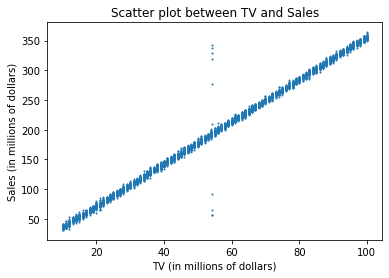

In [26]:
# Create a scatterplot comparing X and Sales (Y).

### YOUR CODE HERE ### 
plt.scatter(x = 'TV', y = 'Sales', data = data, s = 1, marker = 'o')
plt.xlabel('TV (in millions of dollars)')
plt.ylabel('Sales (in millions of dollars)')
plt.title('Scatter plot between TV and Sales')

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

The normality assumption states that the errors are normally distributed.

Create two plots to check this assumption:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

In [27]:
X = data['TV']
fitted_values = model.predict(X)
residuals = model.resid

(-15.0, 15.0)

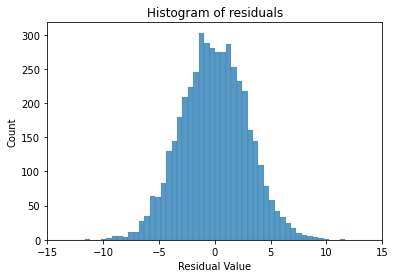

In [32]:
import matplotlib.pyplot as plt

fig = sns.histplot(residuals) 
fig.set_xlabel('Residual Value')
fig.set_title('Histogram of residuals')
fig.set_xlim(-15, 15)

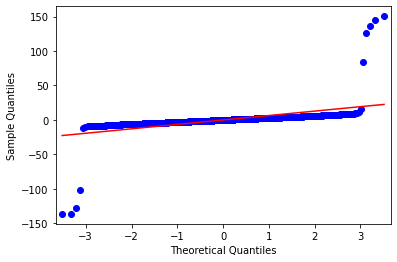

In [34]:
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show() 

### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

(-25.0, 25.0)

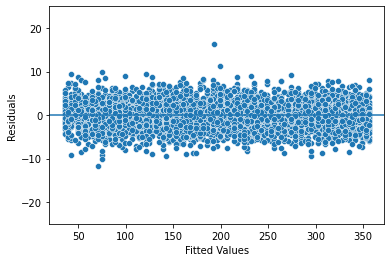

In [38]:
# Import matplotlib
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.ylim(-25, 25)

## Step 4: Results and evaluation

### Display the OLS regression results

If the linearity assumptions are met, you can interpret the model results accurately.

Display the OLS regression results from the fitted model object, which includes information about the dataset, model fit, and coefficients.

In [39]:
# Display the model_results defined previously.

### YOUR CODE HERE ###
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 9.546e+05
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:17:52   Log-Likelihood:                -14971.
No. Observations:                4566   AIC:                         2.995e+04
Df Residuals:                    4564   BIC:                         2.996e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0919      0.219     -0.420      0.674      -0.521       0.337
TV             3.5614      0.004    977.060      0.000       3.554       3.569
==============================================================================
Omnibus:                     4137.933   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21713154.622
Skew:                           2.814   Prob(JB):                         0.00
Kurtosis:                     340.784   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Measure the uncertainty of the coefficient estimates

Model coefficients are estimated. This means there is an amount of uncertainty in the estimate. A p-value and $95\%$ confidence interval are provided with each coefficient to quantify the uncertainty for that coefficient estimate.

Display the model results again.

#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

Dale, D.,Droettboom, M., Firing, E., Hunter, J. (n.d.). [*Matplotlib.Pyplot.Axline — Matplotlib 3.5.0 Documentation*](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.axline.html). 